# import libraries:

In [1]:
# Import the required libraries and set plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import matplotlib.dates as mdates

/Users/mohabarikbin/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# import datsets: 

In [2]:
outer_l = pd.read_csv("Outer_lond_merged.csv")
Inner_l = pd.read_csv("inner_lond_merged.csv")
Central_l = pd.read_csv("central_lond_merged.csv")
london_all = pd.read_csv("london_union_sql.csv")

In [3]:
print(outer_l.shape)
print(Inner_l.shape)
print(Central_l.shape)
print(london_all.shape)

(375660, 14)
(523776, 13)
(758163, 13)
(1567158, 11)


In [4]:
outer_l.head()

,survey_wave,site_id,location,weather,time,period,direction,start_hour,start_minute,number_male_cycles,number_female_cycles,number_unkown_cycles,total_cycles,functional_cycling_area
0,2015,OUTCY001,High Road Leyton,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,Outer
1,2015,OUTCY001,High Road Leyton,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,Outer
2,2015,OUTCY001,High Road Leyton,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,Outer
3,2015,OUTCY001,High Road Leyton,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,Outer
4,2015,OUTCY001,High Road Leyton,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,Outer


In [5]:
Central_l.head()

,survey_wave,site_id,location,weather,time,period,direction,start_hour,start_minute,no_private_cycle,no_hire_cycles,total_cycles,functional_cycling_area
0,2014,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,0.0,0.0,0,Central
1,2014,CENCY001,Millbank (south of Thorney Street),Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,15.0,0.0,15,Central
2,2014,CENCY001,Millbank (south of Thorney Street),Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,35.0,0.0,35,Central
3,2014,CENCY001,Millbank (south of Thorney Street),Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,59.0,2.0,61,Central
4,2014,CENCY001,Millbank (south of Thorney Street),Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,73.0,0.0,73,Central


In [6]:
Inner_l.head()

,survey_wave,site_id,location,weather,time,period,direction,start_hour,start_minute,no_private_cycle,no_hire_cycles,total_cycles,functional_cycling_area
0,2015,INNCY001,Grove Road,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1,0,1,Inner
1,2015,INNCY001,Grove Road,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2,0,2,Inner
2,2015,INNCY001,Grove Road,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2,0,2,Inner
3,2015,INNCY001,Grove Road,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4,0,4,Inner
4,2015,INNCY001,Grove Road,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4,0,4,Inner


In [7]:
london_all.head()

,survey_wave,site_id,location,weather,time,period,direction,start_hour,start_minute,total_cycles,functional_cycling_area
0,2014,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0,Central
1,2014,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,7,Central
2,2014,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,10,Central
3,2014,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Southbound,6.0,0.0,0,Central
4,2014,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Southbound,6.0,0.0,2,Central


In [8]:
london_all.dtypes

survey_wave                  int64
site_id                     object
location                    object
weather                     object
time                        object
period                      object
direction                   object
start_hour                 float64
start_minute               float64
total_cycles                 int64
functional_cycling_area     object
dtype: object

In [9]:
# number of years the data covers 
print(london_all["survey_wave"].unique())

[2014 2015 2016 2017 2018 2019 2020 2021]


In [10]:
# count of unique values 
print(len(london_all["period"].unique()))
print(len(london_all["time"].unique()))
print(len(london_all["weather"].unique()))

6
65
440


In [11]:
list(london_all.columns)

['survey_wave',
 'site_id',
 'location',
 'weather',
 'time',
 'period',
 'direction',
 'start_hour',
 'start_minute',
 'total_cycles',
 'functional_cycling_area']

# clean data :  

In [12]:
# check for missing values:

In [13]:
# view all missing values per column 
london_all.isna().sum()

survey_wave                    0
site_id                        0
location                       0
weather                    17444
time                           6
period                         6
direction                      0
start_hour                     6
start_minute                   6
total_cycles                   0
functional_cycling_area        0
dtype: int64

In [14]:
# replace missing numeric values with 0 and character values with N/A 
london_all["weather"].fillna("N/A", inplace=True)
london_all["time"].fillna(0, inplace=True)
london_all["start_hour"].fillna(0, inplace=True)
london_all["period"].fillna(0, inplace=True)
london_all["start_minute"].fillna(0, inplace=True)

In [15]:
# sense check results 
london_all.isnull().values.any()

False

In [16]:
# view all missing values per column 
Central_l.isna().sum()

survey_wave                    0
site_id                        0
location                       0
weather                    11834
time                           0
period                         0
direction                      0
start_hour                     0
start_minute                   0
no_private_cycle              64
no_hire_cycles                64
total_cycles                   0
functional_cycling_area        0
dtype: int64

In [17]:
# replace missing numeric values with 0 and character values with N/A 
Central_l["weather"].fillna("N/A", inplace=True)
Central_l["no_hire_cycles"].fillna(0, inplace=True)
Central_l["no_private_cycle"].fillna(0, inplace=True)

In [18]:
# sense check results 
Central_l.isnull().values.any()

False

In [19]:
# view all missing values per column 
outer_l.isna().sum()

survey_wave                  0
site_id                      0
location                     0
weather                    968
time                         0
period                       0
direction                    0
start_hour                   0
start_minute                 0
number_male_cycles           0
number_female_cycles         0
number_unkown_cycles         0
total_cycles                 0
functional_cycling_area      0
dtype: int64

In [20]:
# replace missing numeric values with 0 and character values with N/A 
outer_l["weather"].fillna("N/A", inplace=True)

In [21]:
# sense check results 
outer_l.isnull().values.any()

False

In [22]:
# view all missing values per column 
Inner_l.isna().sum()

survey_wave                   0
site_id                       0
location                      0
weather                    4674
time                          6
period                        6
direction                     0
start_hour                    6
start_minute                  6
no_private_cycle              0
no_hire_cycles                0
total_cycles                  0
functional_cycling_area       0
dtype: int64

In [23]:
# replace missing numeric values with 0 and character values with N/A 
Inner_l["weather"].fillna("N/A", inplace=True)
Inner_l["time"].fillna(0, inplace=True)
Inner_l["start_hour"].fillna(0, inplace=True)
Inner_l["period"].fillna(0, inplace=True)
Inner_l["start_minute"].fillna(0, inplace=True)

In [24]:
# determine the number of missing values for 
Inner_l.isnull().values.any()

False

In [25]:
# filter and subset for select years : 2015 & 2018 
list = [2015, 2018]
london_all_f = london_all[london_all['survey_wave'].isin(list)]
london_all_f

,survey_wave,site_id,location,weather,time,period,direction,start_hour,start_minute,total_cycles,functional_cycling_area
92121,2015,CENCY001,Millbank (south of Thorney Street),Damp,1300 - 1315,Inter-peak (10:00-16:00),Northbound,13.0,0.0,3,Central
92122,2015,CENCY001,Millbank (south of Thorney Street),Damp,1300 - 1315,Inter-peak (10:00-16:00),Southbound,13.0,0.0,5,Central
92123,2015,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,3,Central
92124,2015,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,7,Central
92125,2015,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,9,Central
...,...,...,...,...,...,...,...,...,...,...,...
999334,2018,OUTCY451,Thames Path (Lower Ham Road),Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,4,Outer
999335,2018,OUTCY451,Thames Path (Lower Ham Road),Dry,2130 - 2145,Evening (19:00-22:00),Northbound,21.0,30.0,1,Outer
999336,2018,OUTCY451,Thames Path (Lower Ham Road),Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,0,Outer
999337,2018,OUTCY451,Thames Path (Lower Ham Road),Dry,2145 - 2200,Evening (19:00-22:00),Northbound,21.0,45.0,2,Outer


In [26]:
# filter and subset for select years : 2015 & 2018 
list = [2015, 2018]
Inner_f = Inner_l[Inner_l['survey_wave'].isin(list)]
Inner_f

,survey_wave,site_id,location,weather,time,period,direction,start_hour,start_minute,no_private_cycle,no_hire_cycles,total_cycles,functional_cycling_area
0,2015,INNCY001,Grove Road,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1,0,1,Inner
1,2015,INNCY001,Grove Road,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2,0,2,Inner
2,2015,INNCY001,Grove Road,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2,0,2,Inner
3,2015,INNCY001,Grove Road,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4,0,4,Inner
4,2015,INNCY001,Grove Road,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4,0,4,Inner
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305659,2018,INNCY597,Augustus Road,Dry,2045 - 2100,Evening (19:00-22:00),Westbound,20.0,45.0,1,0,1,Inner
305660,2018,INNCY597,Augustus Road,Dry,2100 - 2115,Evening (19:00-22:00),Westbound,21.0,0.0,1,0,1,Inner
305661,2018,INNCY597,Augustus Road,Dry,2115 - 2130,Evening (19:00-22:00),Westbound,21.0,15.0,1,0,1,Inner
305662,2018,INNCY597,Augustus Road,Dry,2130 - 2145,Evening (19:00-22:00),Westbound,21.0,30.0,0,0,0,Inner


In [27]:
# filter and subset for select years : 2015 & 2018 
outer_f = outer_l[outer_l['survey_wave'].isin(list)]
outer_f

,survey_wave,site_id,location,weather,time,period,direction,start_hour,start_minute,number_male_cycles,number_female_cycles,number_unkown_cycles,total_cycles,functional_cycling_area
0,2015,OUTCY001,High Road Leyton,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,Outer
1,2015,OUTCY001,High Road Leyton,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,Outer
2,2015,OUTCY001,High Road Leyton,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,Outer
3,2015,OUTCY001,High Road Leyton,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,Outer
4,2015,OUTCY001,High Road Leyton,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,Outer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375648,2015,OUTCY042,Chiswick High Road,Dry,2130 - 2145,Evening (19:00-22:00),Eastbound,21,30,0,0,7,7,Outer
375649,2018,OUTCY002,High Road Woodford Green,Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,0,0,7,7,Outer
375650,2018,OUTCY027,Morden Road,Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,1,0,7,8,Outer
375651,2018,OUTCY041,Dawley Road,Dry,1845 - 1900,PM peak (16:00-19:00),Northbound,18,45,2,0,7,9,Outer


In [28]:
# filter and subset for select years : 2015 & 2018 
Central_f = Central_l[Central_l['survey_wave'].isin(list)]
Central_f

,survey_wave,site_id,location,weather,time,period,direction,start_hour,start_minute,no_private_cycle,no_hire_cycles,total_cycles,functional_cycling_area
102592,2015,CENCY001,Millbank (south of Thorney Street),Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,9.0,0.0,9,Central
102593,2015,CENCY001,Millbank (south of Thorney Street),Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,29.0,2.0,31,Central
102594,2015,CENCY001,Millbank (south of Thorney Street),Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,32.0,1.0,33,Central
102595,2015,CENCY001,Millbank (south of Thorney Street),Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,58.0,1.0,59,Central
102596,2015,CENCY001,Millbank (south of Thorney Street),Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,83.0,0.0,83,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519483,2018,CENCY702,Haymarket,Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20,45,9.0,0.0,9,Central
519484,2018,CENCY702,Haymarket,Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,6.0,0.0,6,Central
519485,2018,CENCY702,Haymarket,Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21,15,2.0,0.0,2,Central
519486,2018,CENCY702,Haymarket,Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21,30,3.0,0.0,3,Central


In [29]:
# fix weather column 
london_all_f.weather.unique()

array(['Damp', 'Dry', 'Rain/dry', 'Rain/wind', 'Wet', 'Dry/cloudy',
       'Dry/sunny', 'Sunny', 'Cold Windy Dry', 'Fine', 'Rain', 'N/A',
       'Drizzle', 'Windy', 'Drty', 'Cloudy', 'Light Shrs', 'Wet Road',
       'Dry/wet', 'Dry/hot', 'Light Rain', 'Sunny/rainy', 'Dry & Windy',
       'Very Hot Dry', 'Dry Y', 'Dry (windy)', 'Fine (windy)',
       'Wet (windy)', 'Wet/dry', 'Dark', 'Dark Dry', 'Dark Sunny',
       'Dry Dark', 'Slight Drizzle', 'Sunny Cloudy', 'V Light Rain',
       'Fine Drizzle', 'Heavy Showers', 'Light Showers', 'Showers',
       'Lt Rain', 'V Light Shrs', 'D', 'Wetr', 'Showers Mix', 'Dryish',
       'Road Drying Sun Out', 'Road Wet', 'Wetish', 'Some Showers',
       'Occasional Lt Snow Shrs', 'Very Wet', 'Fair', 'Spitting',
       'Cloudy/rain', 'Dry/good', 'Good/dry', 'Dry Fri', 'Dry Mon',
       'Dry Thu', 'Dry Wed', 'Light Shower', 'Rains', 'Shower',
       'Sun/rain', 'Dry                         9', 'Warm + Dry', 'S.wet',
       'S/w', 'Cloudy/sunny', 'Cloudy/

# Manipulate Data: 

In [30]:
# group by month-year and sum of cases per month
lond_trend1 = london_all_f.groupby(london_all_f.functional_cycling_area)\
[['total_cycles']].agg(sum).reset_index()

lond_trend1

,functional_cycling_area,total_cycles
0,Central,3405082
1,Inner,908407
2,Outer,174194


In [31]:
lond_trend2 = london_all_f.groupby(london_all_f.period)\
[['total_cycles']].agg(sum).reset_index()

lond_trend2

,period,total_cycles
0,AM peak (07:00-10:00),1529814
1,Early Morning (06:00-07:00),120273
2,Evening (19:00-22:00),639693
3,Inter-peak (10:00-16:00),771478
4,PM peak (16:00-19:00),1426425


# Visualise: 

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import matplotlib.dates as mdates

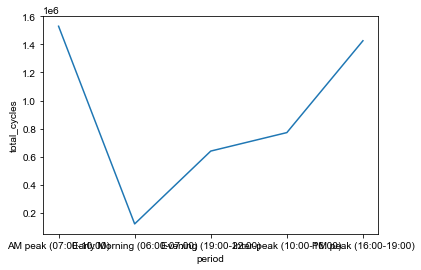

In [33]:
# by period of the day 
ax = sns.lineplot(x='period', y='total_cycles', data = lond_trend2 )

sns.set(rc = {'figure.figsize':(20,100)})

## note: fix y-axis ticks 

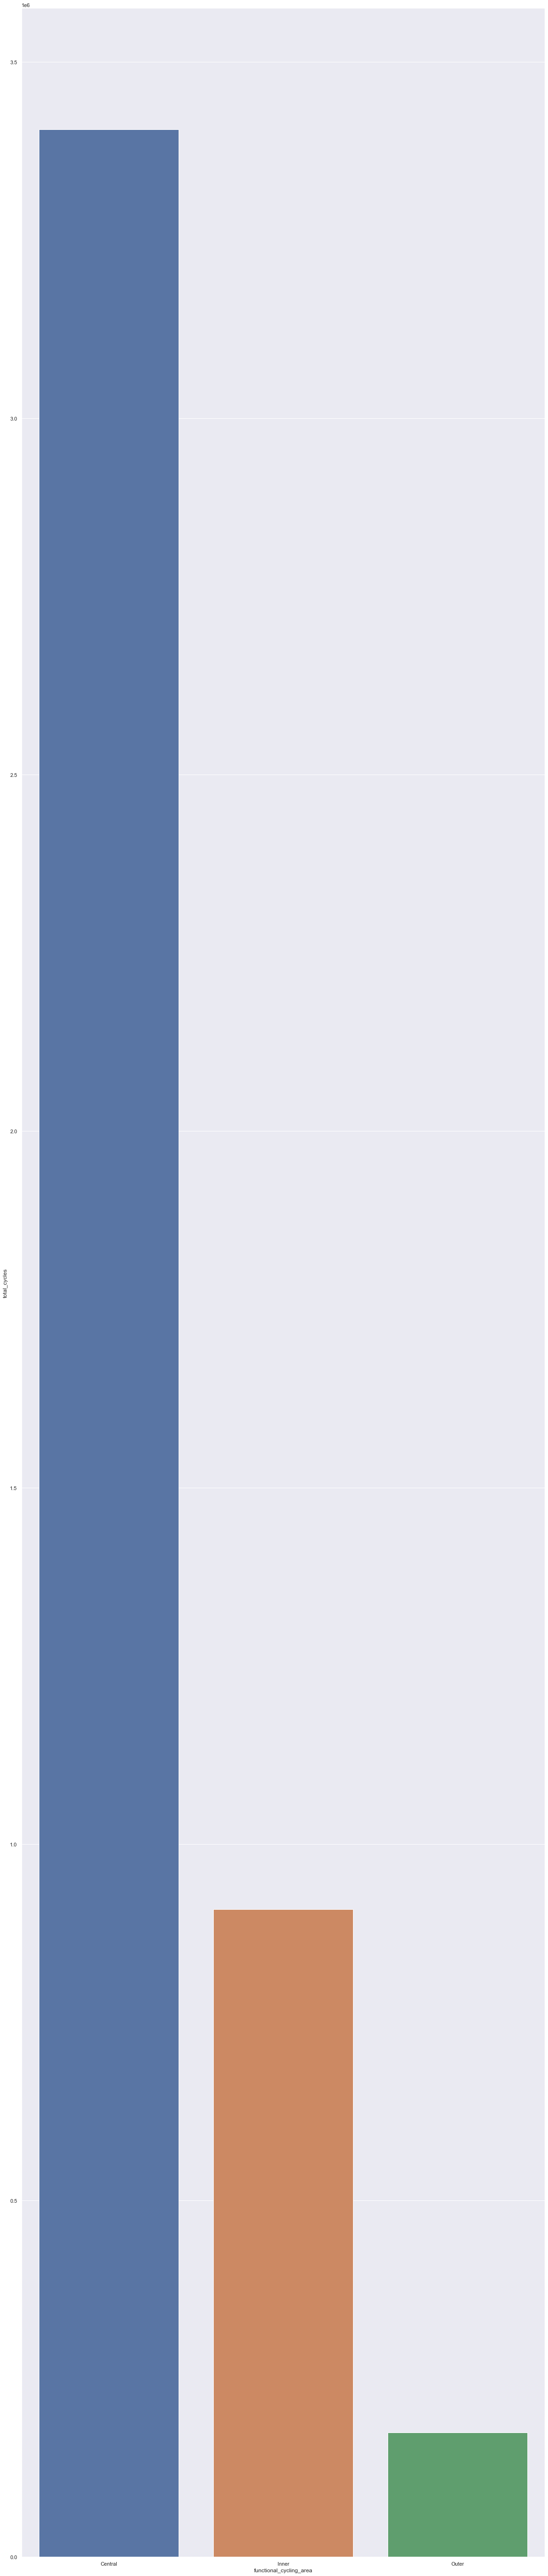

In [35]:
# by functional cycling area 
ax2 = sns.barplot(x = 'functional_cycling_area', y = 'total_cycles', data = lond_trend1)